In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)


Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


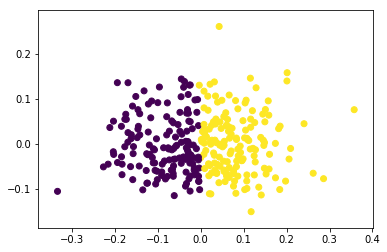

In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [4]:
%timeit pass

# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

11.5 ns ± 0.177 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0       19  154
1      130    0


Your task is to take the  𝑘 -means code here and see what happens when you change the value of  𝑘 . What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

## Trying different K values

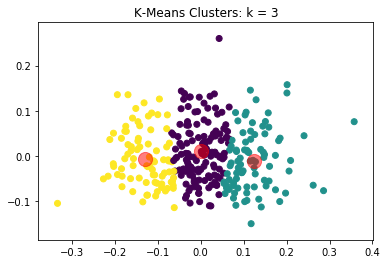

Comparing K-Means Clusters Against the Data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33


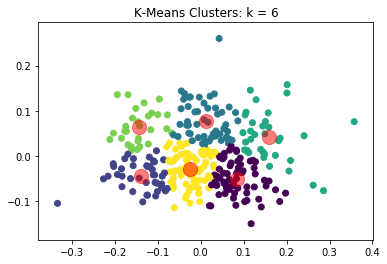

Comparing K-Means Clusters Against the Data:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44


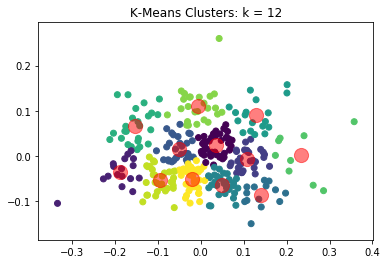

Comparing K-Means Clusters Against the Data:
col_0   0   1
row_0        
0      18  22
1      12   5
2       8  20
3      21   9
4       2  12
5       6  26
6      12   6
7      20   5
8       1   8
9      14  11
10     11  21
11     14  19


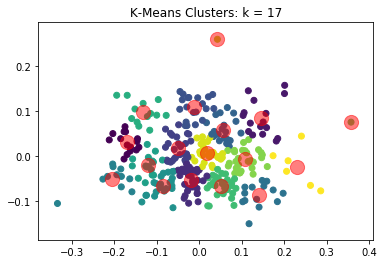

Comparing K-Means Clusters Against the Data:
col_0   0   1
row_0        
0      12   3
1      11   5
2      13  19
3      19   8
4       9  11
5      14   8
6       2  12
7       7   4
8       6  16
9       8   8
10     12   1
11      6  24
12      0   1
13      8  21
14      1   0
15     11  17
16      0   6


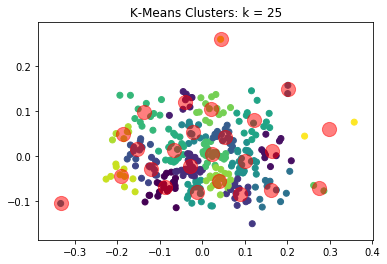

Comparing K-Means Clusters Against the Data:
col_0   0   1
row_0        
0       6  14
1       3   7
2       6   2
3      13  12
4       1  13
5       6   6
6       7   4
7      10   7
8       2   0
9       2   8
10      0   1
11      6   5
12      7  15
13      5  12
14      8   7
15     12   6
16     11   1
17      8  14
18      0   2
19      7   6
20      5  17
21      6   0
22      7   3
23      1   0
24      0   2


In [13]:
K_values = [3,6,12,17,25]
for i in K_values: 
    y_pred = KMeans(n_clusters=i, random_state=42).fit_predict(X_pca)
    estimator = KMeans(n_clusters=i, random_state=42).fit(X_pca)
    centers = estimator.cluster_centers_
    
    # Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_pred, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5);
    plt.title('K-Means Clusters: k = {}'.format(i))
    plt.show()

    # Check the solution against the data.
    print('Comparing K-Means Clusters Against the Data:')
    print(pd.crosstab(y_pred, y))

## Trying different values of K in MiniBatch

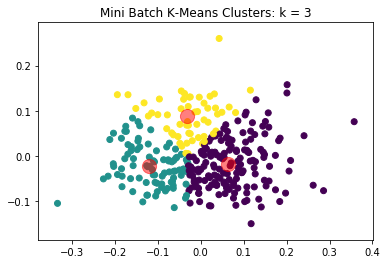

Comparing Mini-Batch K-Means Clusters Against the Data:
col_0   0    1
row_0         
0      49  109
1      52   37
2      38   18


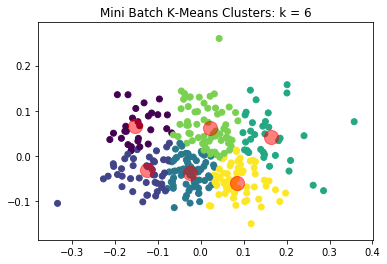

Comparing Mini-Batch K-Means Clusters Against the Data:
col_0   0   1
row_0        
0      23   5
1      23  22
2      30  39
3      14  21
4      36  30
5      13  47


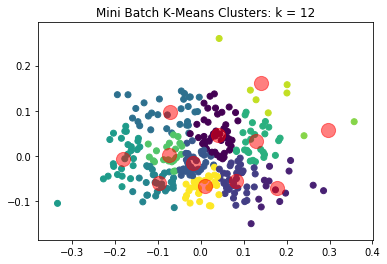

Comparing Mini-Batch K-Means Clusters Against the Data:
col_0   0   1
row_0        
0      24  22
1       2  12
2       5  30
3      18  16
4      21   9
5      10  19
6      21   6
7      12  16
8      12  10
9       0   2
10      5   1
11      9  21


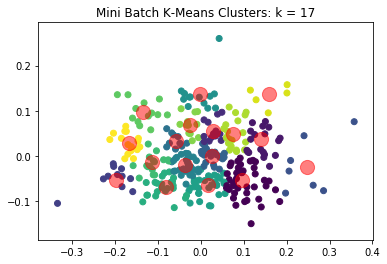

Comparing Mini-Batch K-Means Clusters Against the Data:
col_0   0   1
row_0        
0       8  32
1       7  12
2       9   5
3       7   4
4       0   7
5       7  15
6       7   3
7      17  13
8       8   5
9       8  24
10      7  16
11      8   8
12     12   1
13      5   7
14     12   8
15      4   1
16     13   3


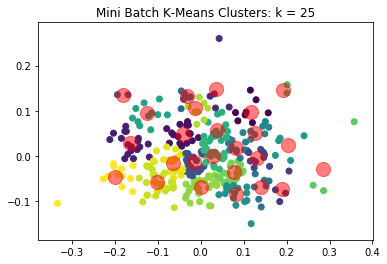

Comparing Mini-Batch K-Means Clusters Against the Data:
col_0   0   1
row_0        
0       6   2
1       9   7
2      13   5
3       3   2
4       0   4
5       3   8
6      12  10
7       2   0
8       4   2
9       2   5
10      5   6
11      3   5
12      2  13
13      1   4
14     10   1
15     12   5
16      6  14
17      2   0
18      0   3
19      3  15
20      8  19
21      3   5
22     10  16
23     12   9
24      8   4


In [14]:
K_values = [3,6,12,17,25]
for i in K_values: 
    
    # Each batch will be made up of 200 data points.
    minibatchkmeans = MiniBatchKMeans(
        init='random',
        n_clusters=i,
        batch_size=200)
    minibatchkmeans.fit(X_pca)
    centers = minibatchkmeans.cluster_centers_
    
    # Add the new predicted cluster memberships to the data frame.
    predict_mini = minibatchkmeans.predict(X_pca)
    
    # Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c = predict_mini, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5);
    plt.title('Mini Batch K-Means Clusters: k = {}'.format(i))
    plt.show()

    # Check the MiniBatch model against the data.
    print('Comparing Mini-Batch K-Means Clusters Against the Data:')
    print(pd.crosstab(predict_mini, y))

## Underlying Data DIstribution

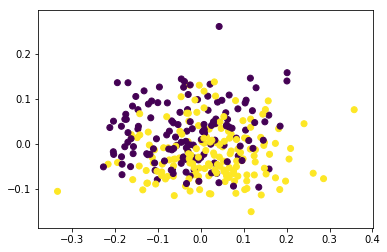

1    164
0    139
Name: y, dtype: int64

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, cmap='viridis')
plt.show()

actuals = pd.DataFrame()
actuals['y'] = y
actuals['y'].value_counts()


### With respect to the underlying data, when K is assigned a value in the range of 5-7, the classifications do seem to strike a cohesive data density, however in extreme values greater than 12, the centroids become over-asssigned as in k = 25, some of the outliers have been labeled. 